# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [5]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hongyisui/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
# Read your api key environment variable

from newsapi import NewsApiClient
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [24]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [26]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q='bitcoin',
    language="en",
    page_size=100,
    sort_by="relevancy"
)



In [27]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q='etherium',
    language='en',
    page_size=100,
    sort_by="relevancy"
)

In [35]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments =[]

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)
btc_df.head()

,text,date,compound,positive,negative,neutral
0,A similar hoax earlier this year tied Walmart ...,2021-11-05,-0.2732,0.000,0.063,0.937
1,Theres a big new presence slurping up power fr...,2021-10-28,0.3612,0.096,0.000,0.904
2,"For all the talk of democratizing finance, the...",2021-10-26,0.0000,0.000,0.000,1.000
3,"In keeping with a previous announcement, AMC t...",2021-11-12,0.5719,0.153,0.000,0.847
4,Representation of cryptocurrency Bitcoin is pl...,2021-10-21,0.0000,0.000,0.000,1.000


In [34]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments =[]

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)
eth_df.head()

,text,date,compound,positive,negative,neutral
0,"Angelina Lee is an expert in JavaScript, TypeS...",2021-11-01,-0.2960,0.000,0.061,0.939
1,AppleInsider is supported by its audience and ...,2021-10-20,0.4588,0.121,0.000,0.879
2,When the largest Islamic organization in Indon...,2021-11-05,0.1280,0.049,0.000,0.951
3,"JEFFERSONVILLE, Ohio, Nov. 11, 2021 /PRNewswir...",2021-11-11,0.8225,0.270,0.055,0.675
4,From Gigabyte's VISION series of graphics card...,2021-11-04,0.6166,0.132,0.000,0.868


In [36]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.133182,0.052380,0.021910,0.925720
std,0.355848,0.066516,0.046369,0.077688
min,-0.790600,0.000000,0.000000,0.659000
25%,0.000000,0.000000,0.000000,0.886250
50%,0.000000,0.000000,0.000000,0.927500
75%,0.415650,0.088750,0.000000,1.000000
max,0.862500,0.243000,0.280000,1.000000


In [37]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,30.000000,30.000000,30.000000,30.000000
mean,0.326567,0.100667,0.025633,0.873700
std,0.336119,0.080927,0.035592,0.095273
min,-0.296000,0.000000,0.000000,0.675000
25%,0.000000,0.053750,0.000000,0.825500
50%,0.360900,0.082500,0.000000,0.873500
75%,0.585900,0.138000,0.058000,0.936500
max,0.918400,0.270000,0.098000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: bitcoin,0.052

Q: Which coin had the highest compound score?

A: eth,92%

Q. Which coin had the highest positive score?

A: eth,0.27

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [38]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [39]:
# Instantiate the lemmatizer
Lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [69]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw= set(stopwords.words('english'))
    # Remove the punctuation from text
    regex= re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('',str(text))
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    # Lemmatize words into root words
    lem = [Lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    tokens =[word.lower() for word in lem if word.lower() not in sw ]
    # Remove the stop words
    return tokens


In [70]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df.text.apply(tokenizer)
btc_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,A similar hoax earlier this year tied Walmart ...,2021-11-05,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, walmart, ..."
1,Theres a big new presence slurping up power fr...,2021-10-28,0.3612,0.096,0.000,0.904,"[theres, big, new, presence, slurping, power, ..."
2,"For all the talk of democratizing finance, the...",2021-10-26,0.0000,0.000,0.000,1.000,"[talk, democratizing, finance, vast, majority,..."
3,"In keeping with a previous announcement, AMC t...",2021-11-12,0.5719,0.153,0.000,0.847,"[keeping, previous, announcement, amc, theater..."
4,Representation of cryptocurrency Bitcoin is pl...,2021-10-21,0.0000,0.000,0.000,1.000,"[representation, cryptocurrency, bitcoin, plac..."


In [71]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.text.apply(tokenizer)
eth_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,"Angelina Lee is an expert in JavaScript, TypeS...",2021-11-01,-0.2960,0.000,0.061,0.939,"[angelina, lee, expert, javascript, typescript..."
1,AppleInsider is supported by its audience and ...,2021-10-20,0.4588,0.121,0.000,0.879,"[appleinsider, supported, audience, may, earn,..."
2,When the largest Islamic organization in Indon...,2021-11-05,0.1280,0.049,0.000,0.951,"[largest, islamic, organization, indonesia, la..."
3,"JEFFERSONVILLE, Ohio, Nov. 11, 2021 /PRNewswir...",2021-11-11,0.8225,0.270,0.055,0.675,"[jeffersonville, ohio, nov, prnewswire, destin..."
4,From Gigabyte's VISION series of graphics card...,2021-11-04,0.6166,0.132,0.000,0.868,"[gigabytes, vision, series, graphic, card, cre..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [72]:
from collections import Counter
from nltk import ngrams

In [75]:
# Generate the Bitcoin N-grams where N=2
btc_tokenized = tokenizer(btc_df.text.str.cat())
N=2
bigram_counts_btc = Counter(ngrams(btc_tokenized,N))
print(dict(bigram_counts_btc))


{('similar', 'hoax'): 1, ('hoax', 'earlier'): 1, ('earlier', 'year'): 1, ('year', 'tied'): 1, ('tied', 'walmart'): 1, ('walmart', 'litecoinif'): 1, ('litecoinif', 'buy'): 1, ('buy', 'something'): 1, ('something', 'verge'): 1, ('verge', 'link'): 1, ('link', 'vox'): 1, ('vox', 'media'): 1, ('media', 'may'): 1, ('may', 'earn'): 1, ('earn', 'commission'): 1, ('commission', 'see'): 1, ('see', 'ethic'): 1, ('ethic', 'statementphoto'): 1, ('statementphoto', 'illustration'): 1, ('illustration', 'thiago'): 1, ('thiago', 'prudencios'): 1, ('prudencios', 'charstheres'): 1, ('charstheres', 'big'): 1, ('big', 'new'): 1, ('new', 'presence'): 1, ('presence', 'slurping'): 1, ('slurping', 'power'): 1, ('power', 'us'): 1, ('us', 'grid'): 1, ('grid', 'growing'): 1, ('growing', 'bitcoin'): 1, ('bitcoin', 'miner'): 2, ('miner', 'new'): 1, ('new', 'research'): 1, ('research', 'show'): 1, ('show', 'us'): 1, ('us', 'ha'): 1, ('ha', 'overtaken'): 3, ('overtaken', 'china'): 3, ('china', 'top'): 1, ('top', 'glob

In [77]:
# Generate the Ethereum N-grams where N=2
eth_tokenized = tokenizer(eth_df.text.str.cat())
N=2
bigram_counts_eth = Counter(ngrams(eth_tokenized,N))
print(dict(bigram_counts_eth))

{('angelina', 'lee'): 1, ('lee', 'expert'): 1, ('expert', 'javascript'): 1, ('javascript', 'typescript'): 1, ('typescript', 'nodejs'): 1, ('nodejs', 'react'): 1, ('react', 'ai'): 1, ('ai', 'mia'): 1, ('mia', 'khalifa'): 1, ('khalifa', 'worked'): 1, ('worked', 'instagram'): 1, ('instagram', 'wa'): 1, ('wa', 'team'): 1, ('team', 'coffee'): 1, ('coffee', 'maker'): 1, ('maker', 'mined'): 1, ('mined', 'etherium'): 1, ('etherium', 'company'): 1, ('company', 'server'): 1, ('server', 'gr'): 1, ('gr', 'charsappleinsider'): 1, ('charsappleinsider', 'supported'): 1, ('supported', 'audience'): 1, ('audience', 'may'): 1, ('may', 'earn'): 1, ('earn', 'commission'): 1, ('commission', 'amazon'): 1, ('amazon', 'associate'): 1, ('associate', 'affiliate'): 1, ('affiliate', 'partner'): 1, ('partner', 'qualifying'): 1, ('qualifying', 'purchase'): 1, ('purchase', 'affiliate'): 1, ('affiliate', 'partnership'): 1, ('partnership', 'influence'): 1, ('influence', 'editorial'): 1, ('editorial', 'con'): 1, ('con',

In [81]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [84]:
# Use token_count to get the top 10 words for Bitcoin
btc_top_10 = token_count(btc_tokenized, 10)
btc_top_10

[('bitcoin', 75),
 ('reuters', 31),
 ('us', 25),
 ('cryptocurrency', 24),
 ('new', 22),
 ('first', 19),
 ('fund', 18),
 ('oct', 16),
 ('ceo', 15),
 ('exchangetraded', 14)]

In [85]:
# Use token_count to get the top 10 words for Ethereum
eth_top_10 = token_count(eth_tokenized, 10)
eth_top_10

[('ha', 10),
 ('year', 7),
 ('wa', 5),
 ('finance', 5),
 ('inflation', 5),
 ('prnewswire', 4),
 ('investor', 4),
 ('decentralized', 4),
 ('cryptocurrency', 4),
 ('price', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

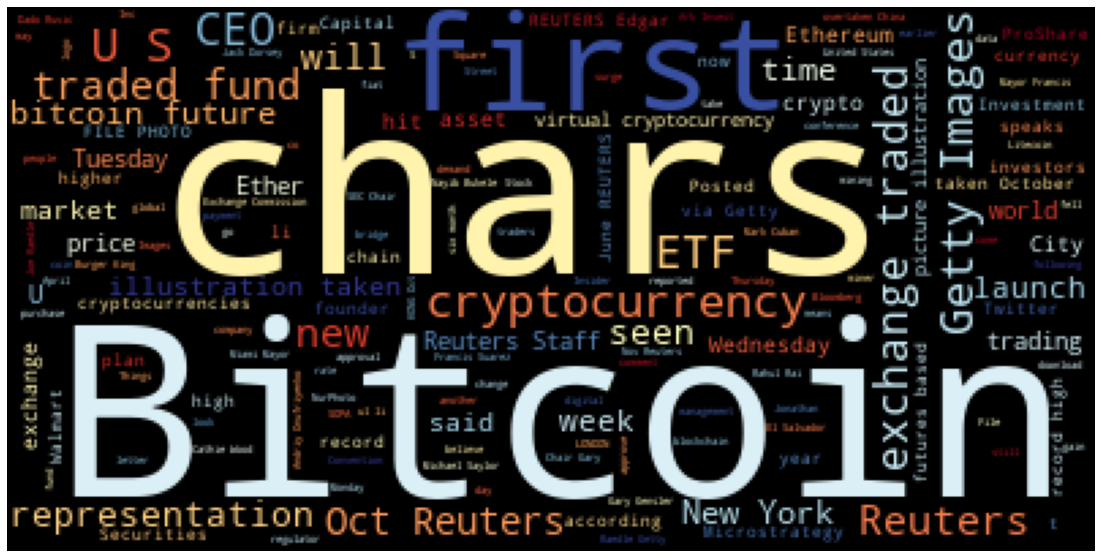

In [100]:
# Generate the Bitcoin word cloud
cloud_btc = WordCloud(colormap="RdYlBu").generate(btc_df.text.str.cat())
cloud_btc
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.imshow(cloud_btc)

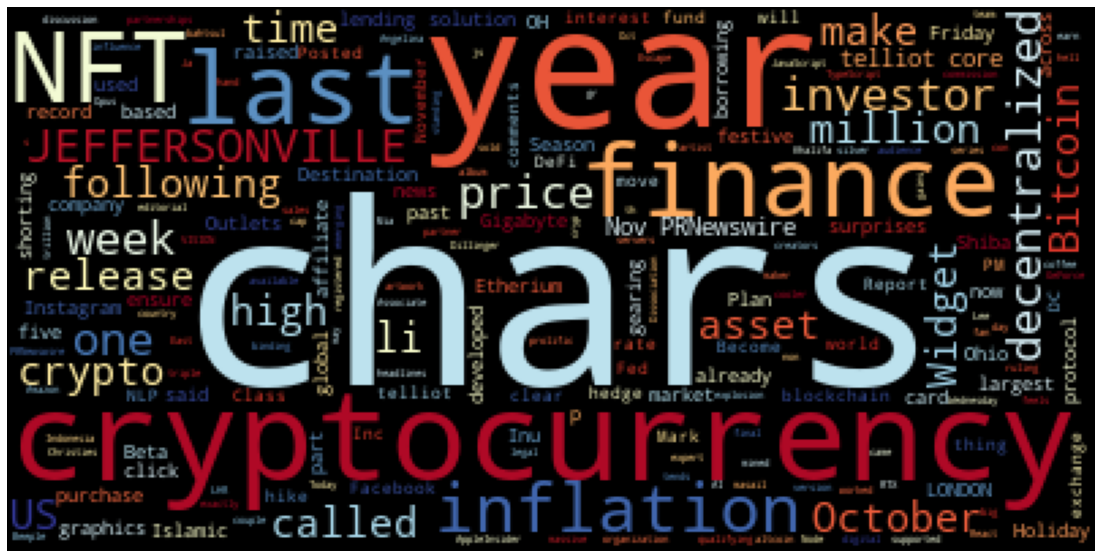

In [97]:
# Generate the Ethereum word cloud
cloud_eth = WordCloud(colormap="RdYlBu").generate(eth_df.text.str.cat())
cloud_eth
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.imshow(cloud_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [91]:
import spacy
from spacy import displacy

In [92]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [93]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [101]:
# Concatenate all of the Bitcoin text together
all_concat_btc = btc_df.text.str.cat()
all_concat_btc

'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]Theres a big new presence slurping up power from the U.S. grid, and its growing: bitcoin miners. New research shows that the U.S. has overtaken China as the top global destination for bitcoin mining … [+3088 chars]For all the talk of democratizing finance, the vast majority of Bitcoin continues to be owned by a relative handful of investors.\r\nAs flagged by Bloomberg, newly released data by the National Bureau … [+4274 chars]In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars]Representation of cryptocurrency Bitcoin is placed on PC motherboard in this illustration taken, June 29, 2021. REUTERS/Dado Ru

In [103]:
# Run the NER processor on all of the text
btc_doc = nlp(all_concat_btc)


# Add a title to the document
btc_doc.user_data["Title"] = "Bitcoin NER"

In [104]:
# Render the visualization
displacy.render(btc_doc, style = 'ent')

In [105]:
# List all Entities
for i in btc_doc.ents:
    print(i.text,i.label_)

earlier this year DATE
Walmart PERSON
Verge ORG
Vox Media FAC
Thiago Prudencio/ ORG
U.S. GPE
U.S. GPE
China GPE
Bitcoin GPE
Bloomberg GPE
the National Bureau ORG
AMC ORG
Bitcoin GPE
Ethereum GPE
Bitcoin Cash PERSON
Litecoin PERSON
Bitcoin GPE
June 29, 2021 DATE
REUTERS/ ORG
Dado Ruvic PERSON
Oct 21 DATE
Reuters ORG
Bitcoin GPE
Bitcoin GPE
October 19, 2021 DATE
REUTERS/Edgar SuLONDON ORG
Oct 20 DATE
Reuters ORG
Bitcoin GPE
Bitcoin GPE
October 19, 2021 DATE
Edgar SuHONG KONG PERSON
Oct 20 DATE
Reuters ORG
Bitcoin GPE
Bitcoin GPE
Wednesday DATE
first ORDINAL
U.S. GPE
Conway G. Gittens PERSON
Bitcoin GPE
October 18, 2021 DATE
Oct 19 DATE
Reuters ORG
six-month DATE
Reuters ORG
Reuters ORG
Bitcoin GPE
six-month DATE
Tuesday DATE
U.S. GPE
first ORDINAL
Tuesday DATE
ProShares ORG
Bitcoin GPE
Marco Bello PERSON
The Securities and Exchange Commission ORG
Valkyrie ORG
ETF bitcoin ORG
NurPhoto ORG
ul><li PERSON
ETF ORG
Bloomberg PERSON
first ORDINAL
ETF ORG
Rafael Henrique PERSON
Bitcoin GPE
7% PE

---

### Ethereum NER

In [106]:
# Concatenate all of the Ethereum text together
all_concat_eth = eth_df.text.str.cat()
all_concat_eth

'Angelina Lee is an expert in JavaScript, TypeScript, Node.js, React AI, and Mia Khalifa. When she worked at Instagram, she was the "team coffee maker" and mined Etherium on company servers. Before gr… [+764 chars]AppleInsider is supported by its audience and may earn commission as an Amazon Associate and affiliate partner on qualifying purchases. These affiliate partnerships do not influence our editorial con… [+1056 chars]When the largest Islamic organization in Indonesia, the largest Islamic country, makes a ruling, it tends to make headlines. Following a "bahtsul masail," or non-binding legal discussion, the East Ja… [+4078 chars]JEFFERSONVILLE, Ohio, Nov. 11, 2021 /PRNewswire/ -- Destination Outlets, in Jeffersonville, OH, is already gearing up to ensure the 2021 Holiday Season is a year like no other, with festive surprises… [+2047 chars]From Gigabyte\'s VISION series of graphics cards for creators, a GeForce RTX 3070 graphics card with a silver triple fan cooler is now available

In [107]:
# Run the NER processor on all of the text
eth_doc = nlp(all_concat_eth)
# Add a title to the document
eth_doc.user_data["Title"] = "Ethereum NER"

In [108]:
# Render the visualization
displacy.render(eth_doc, style = "ent")

In [110]:
# List all Entities
for i in eth_doc.ents:
    print(i.text, i.label_)

Angelina Lee PERSON
JavaScript GPE
TypeScript ORG
React AI GPE
Mia Khalifa PERSON
Etherium ORG
gr PERSON
Amazon Associate ORG
Islamic NORP
Indonesia GPE
Islamic NORP
the East Ja LOC
Ohio GPE
Nov. 11, 2021 /PRNewswire/ DATE
Jeffersonville GPE
OH GPE
the 2021 Holiday Season DATE
Gigabyte PERSON
GeForce RTX 3070 PRODUCT
LHR ORG
Etherium ORG
Nov. 5, 2021 /PRNewswire/ DATE
Cryptocurrency ORG
the past couple of years DATE
five years DATE
October 14, 2016 DATE
one CARDINAL
five years DATE
Oct. 29, 2021 DATE
the past year DATE
One CARDINAL
digital ORG
Beeple ORG
NFT ORG
Opus PRODUCT
$69 million MONEY
Christies ORG
one CARDINAL
Friday DATE
$5.75 million MONEY
Wednesday, October 27 DATE
$2.48 trillion MONEY
a day DATE
Shiba Inu PERSON
277 bill QUANTITY
Cryptocurrency-Widget ORG
DeFi ORG
DeFi PERSON
American NORP
Jim Cramer's PERSON
Mad Money WORK_OF_ART
Thursday DATE
Facebook ORG
last year DATE
four CARDINAL
Bored Ape Yacht Club ORG
10,000 CARDINAL
Last week DATE
Valve PERSON
Steam PERSON
YouTub

---